(-0.5, 399.5, 199.5, -0.5)

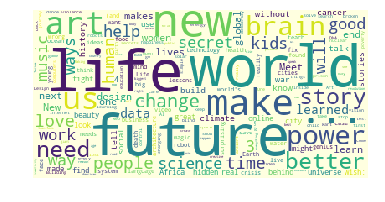

In [241]:
import matplotlib
import pandas
from wordcloud import WordCloud,STOPWORDS

pandas.read_csv('tedtalks4.csv')

df = pandas.read_csv('tedtalks4.csv', header=None, 
                     names=['durations','speakers','titles','views','hashtags'])


all_text = []
for text in df['titles']:
    all_text.extend(text.split())

word_count = {}
        
        
stopwords = set(STOPWORDS)
stopwords.add("—")

def is_stop_word(x):
    return x in stopwords

for word in all_text:
    if is_stop_word(word.lower()):
        continue
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] = word_count[word]+1



wc = WordCloud(background_color='lightyellow',stopwords=STOPWORDS)
w = wc.generate_from_frequencies(word_count)

import matplotlib.pyplot as plt
plt.imshow(w)
plt.axis('off')

# 1. What are the most popular TED titles about?

### We could see the wordcloud above, people pay more attention to the world, future, new life, art, brain, make change, power, story, etc.

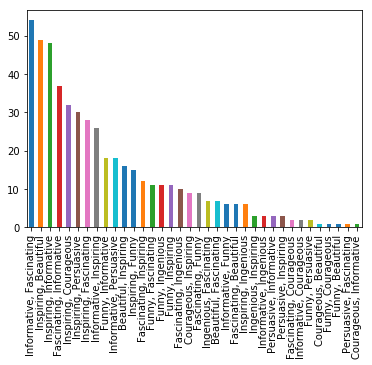

In [238]:
df['hashtags'][1:500].value_counts().plot(kind='bar')

# 2. What are the most frequent hashtags people gave?

### 'Informative and Fascinating', 'Inspiring and Beautiful', 'Inpiring and Informative' rank the top three.

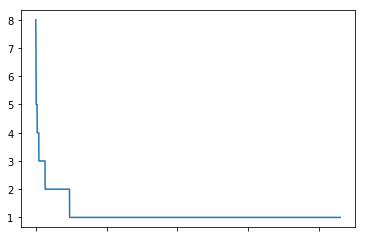

In [243]:
df['speakers'][1:].value_counts().plot(kind='line')

# It seems that someone came to TED 8 times! Who is he?

### Let's find out below.

In [244]:
df['speakers'].value_counts()

Hans Rosling                    8
Juan Enriquez                   7
Marco Tempest                   6
Chris Anderson                  5
Clay Shirky                     5
Jacqueline Novogratz            5
Nicholas Negroponte             5
Julian Treasure                 5
Rives                           5
Dan Ariely                      5
Eve Ensler                      4
Robert Full                     4
Kevin Kelly                     4
Jonathan Drori                  4
Ken Robinson                    4
Barry Schwartz                  4
Bill Gates                      4
Stefan Sagmeister               4
David Pogue                     4
Al Gore                         4
Steven Johnson                  4
Lawrence Lessig                 4
Aimee Mullins                   3
Michael Sandel                  3
Sarah Jones                     3
Arthur Benjamin                 3
Peter Diamandis                 3
Blaise Agüera y Arcas           3
Tim Berners-Lee                 3
Sebastian Wern

# 3. Hans Rosling came TED for 8 times. What are his topics about? How many views and what are the hashtags?


In [260]:
def find_speaker(x):
    return x.find('Hans Rosling') != -1
df2 = df[df['speakers'].apply(find_speaker)]
df2

,durations,speakers,titles,views,hashtags
27,19:50,Hans Rosling,The best stats you've ever seen,12M,"Informative, Fascinating"
166,19:05,Hans Rosling and Ola Rosling,How not to be ignorant about the world,3.9M,"Informative, Funny"
216,18:57,Hans Rosling,New insights on poverty,3.3M,"Inspiring, Informative"
245,10:04,Hans Rosling,"Global population growth, box by box",3M,"Informative, Persuasive"
383,13:20,Hans Rosling,Religions and babies,2.2M,"Informative, Fascinating"
595,15:50,Hans Rosling,Asia's rise — how and when,1.7M,"Fascinating, Informative"
814,19:56,Hans Rosling,Let my dataset change your mindset,1.5M,"Informative, Fascinating"
1687,10:02,Hans Rosling,"Insights on HIV, in stunning data visuals",945K,"Informative, Persuasive"
2013,15:34,Hans Rosling,The good news of the decade? We're winning the...,756K,"Ingenious, Fascinating"


In [263]:
df2['hashtags'].value_counts()

Informative, Fascinating    3
Informative, Persuasive     2
Inspiring, Informative      1
Fascinating, Informative    1
Informative, Funny          1
Ingenious, Fascinating      1
Name: hashtags, dtype: int64

# 4.From above two charts, we could see that... 

### Hans Rosling's talks are tagged as 'Informative and Fascinating', which is the No.1 hashtag in TED. 
### We could infer that not all his talks attracted many views, but those 'Informative and Fascinating' talks are definitly along with more views.

# 5. What did he mainly talk about  Let's do another data analysis and dig out more story...